In [30]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

scenario = ['PAK', 'RUS', 'HOA', 'URU', 'ALL']

df = [ pd.read_csv(scenario[i] + '-Losses.csv') for i in range(len(scenario)) ]
print(df[2].head())

          area                 item     amount [t]  absolute_losses [t]  \
0  Afghanistan                Abaca       0.000000         0.000000e+00   
1  Afghanistan    Alcohol, Non-Food    2025.496935        -1.112943e-02   
2  Afghanistan  Apples and products  273405.028019        -6.313203e-07   
3  Afghanistan                Asses       0.000000         0.000000e+00   
4  Afghanistan              Bananas   97000.991410         0.000000e+00   

   relative_losses  al/capita [kg]  
0     0.000000e+00    0.000000e+00  
1    -5.494697e-06   -2.903883e-07  
2    -2.309042e-12   -1.647236e-11  
3     0.000000e+00    0.000000e+00  
4     0.000000e+00    0.000000e+00  


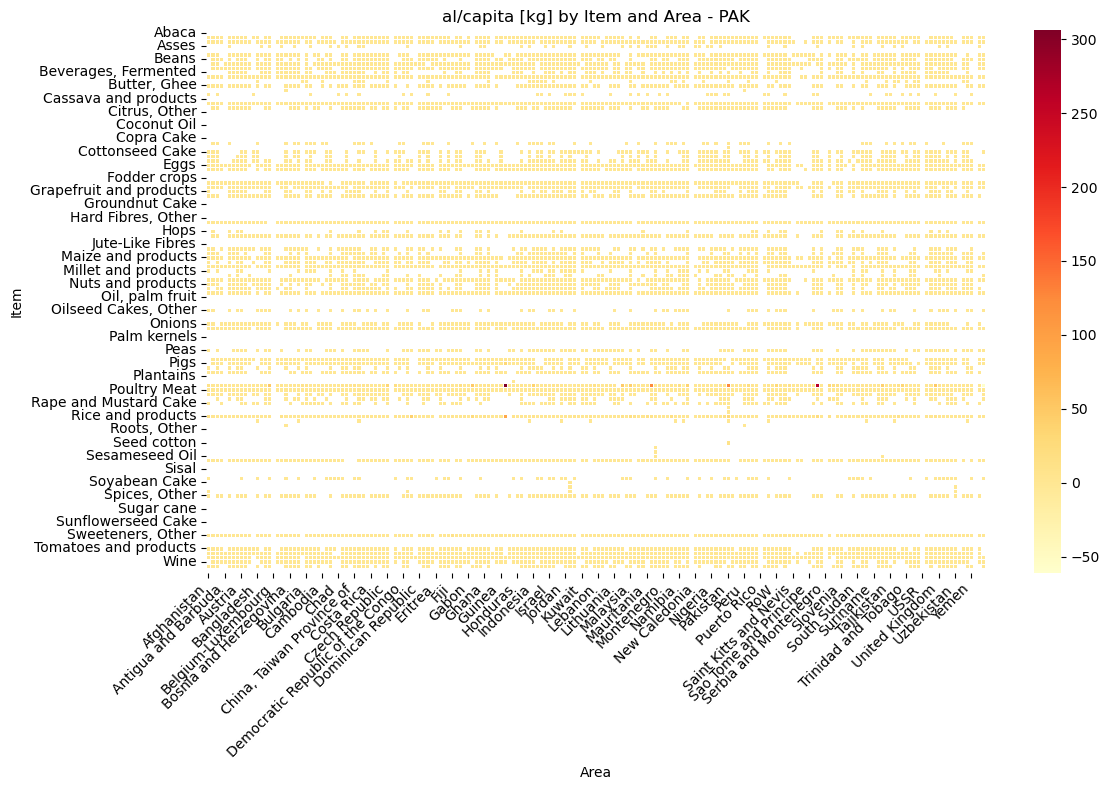

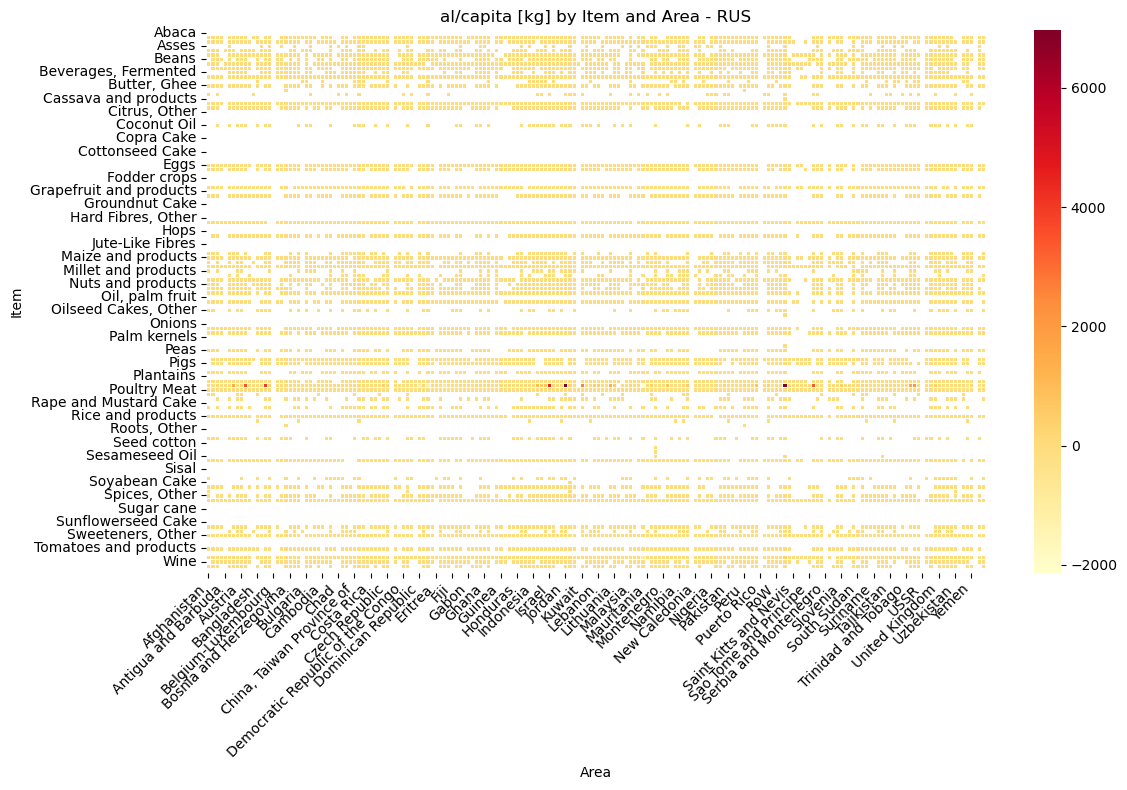

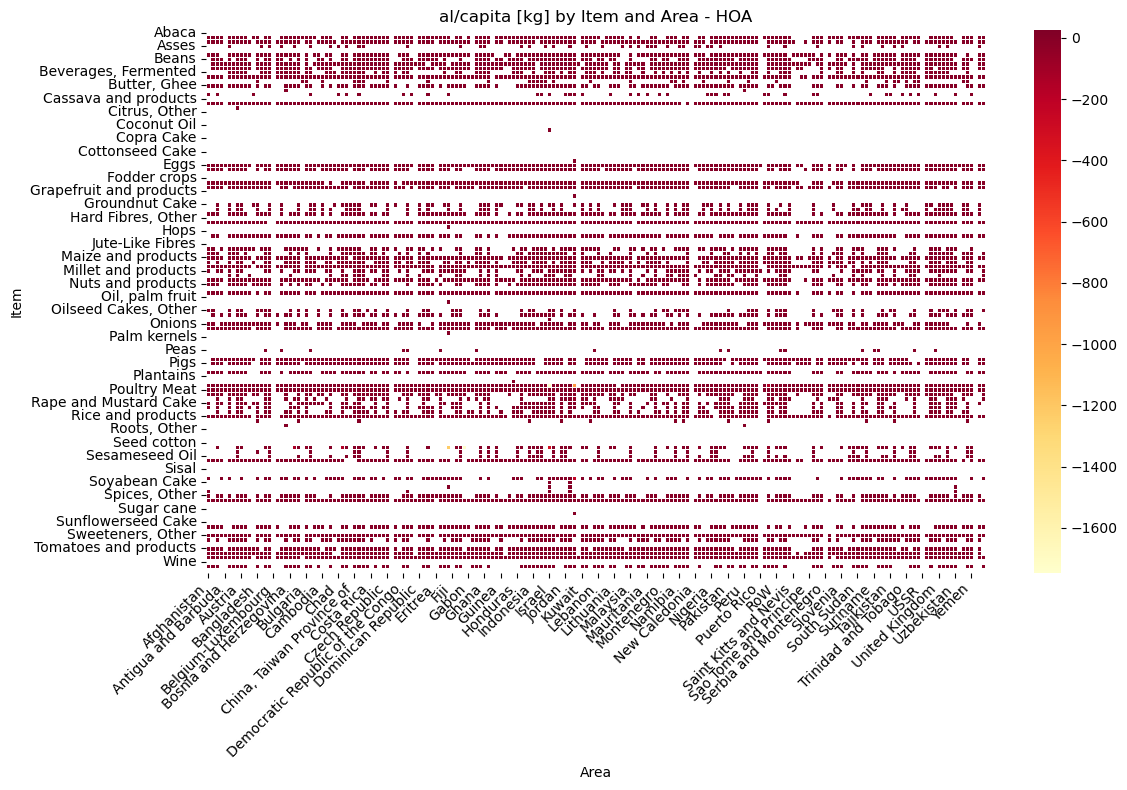

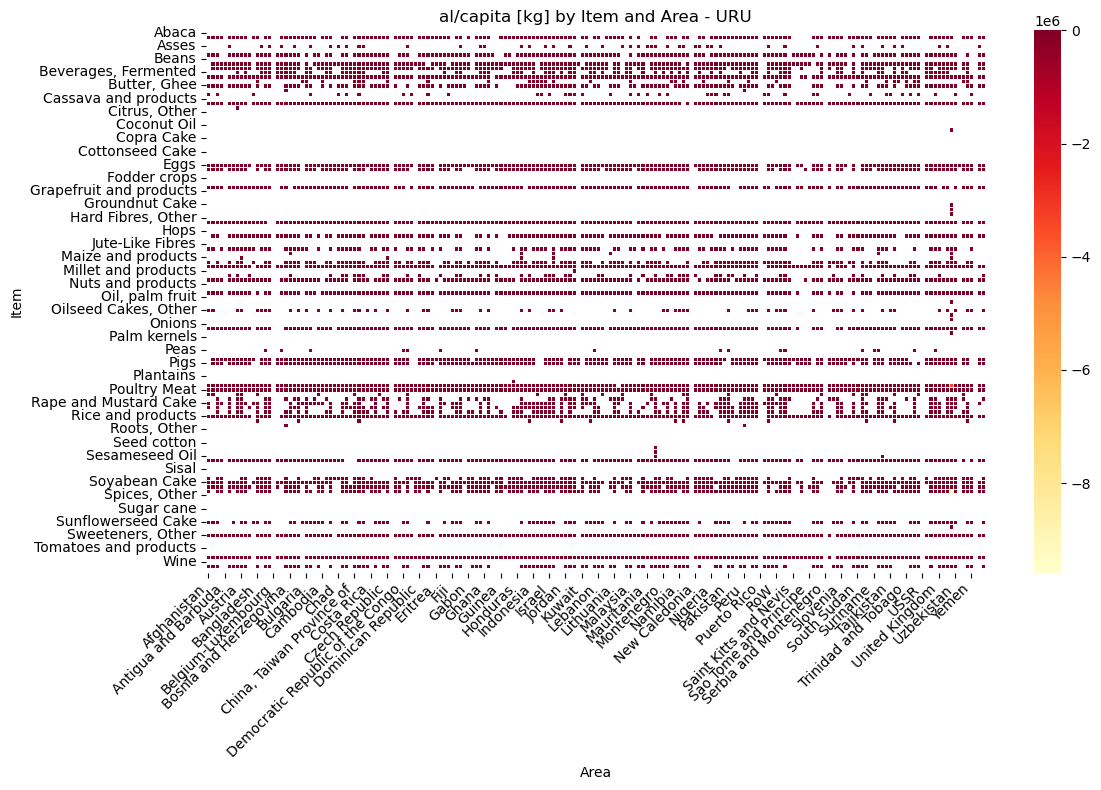

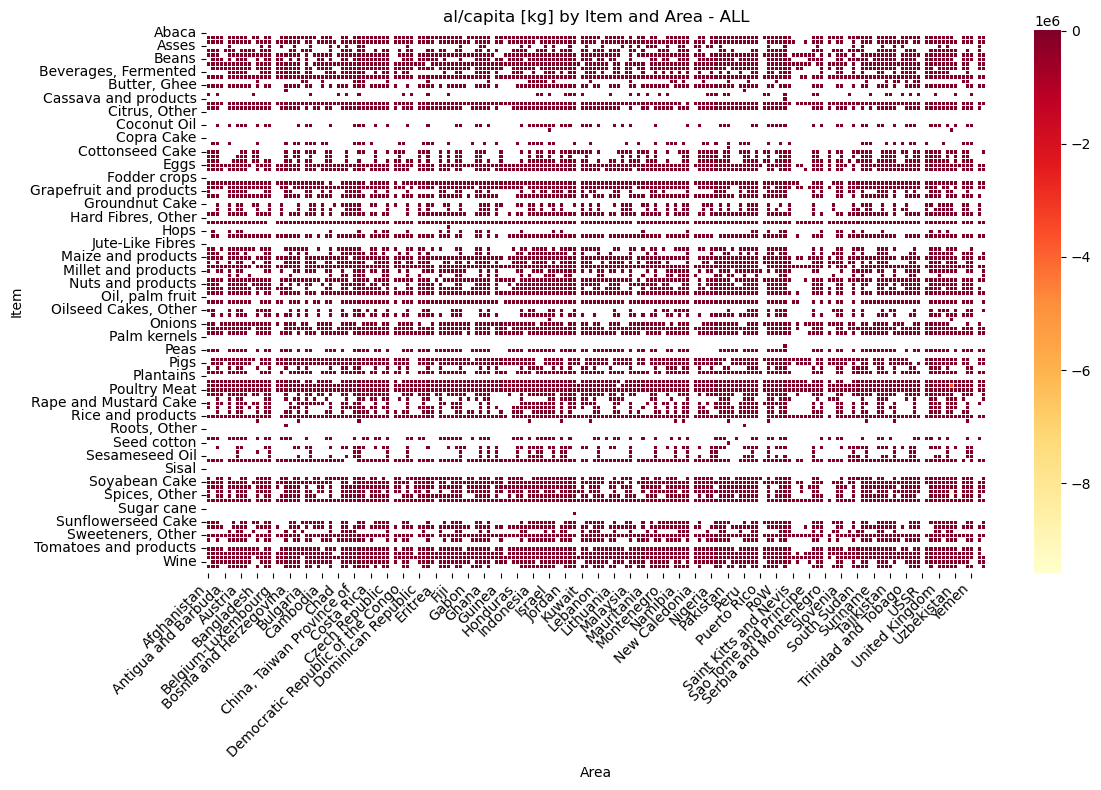

In [32]:
for i in range (len(scenario)):
    pivot_table = df[i].pivot_table(
    index='item',
    columns='area',
    values='al/capita [kg]',
    aggfunc='sum',
    fill_value=0
    )

    # Replace zeros with NaN
    masked_data = pivot_table.replace(0, np.nan)
    cmap = sns.color_palette("YlOrRd", as_cmap=True)
    cmap.set_bad(color='white')

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(masked_data, cmap=cmap, linewidths=0.5)
    plt.title("al/capita [kg] by Item and Area - " + scenario[i])
    plt.xlabel("Area")
    plt.ylabel("Item")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_19064/2054449147.py:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



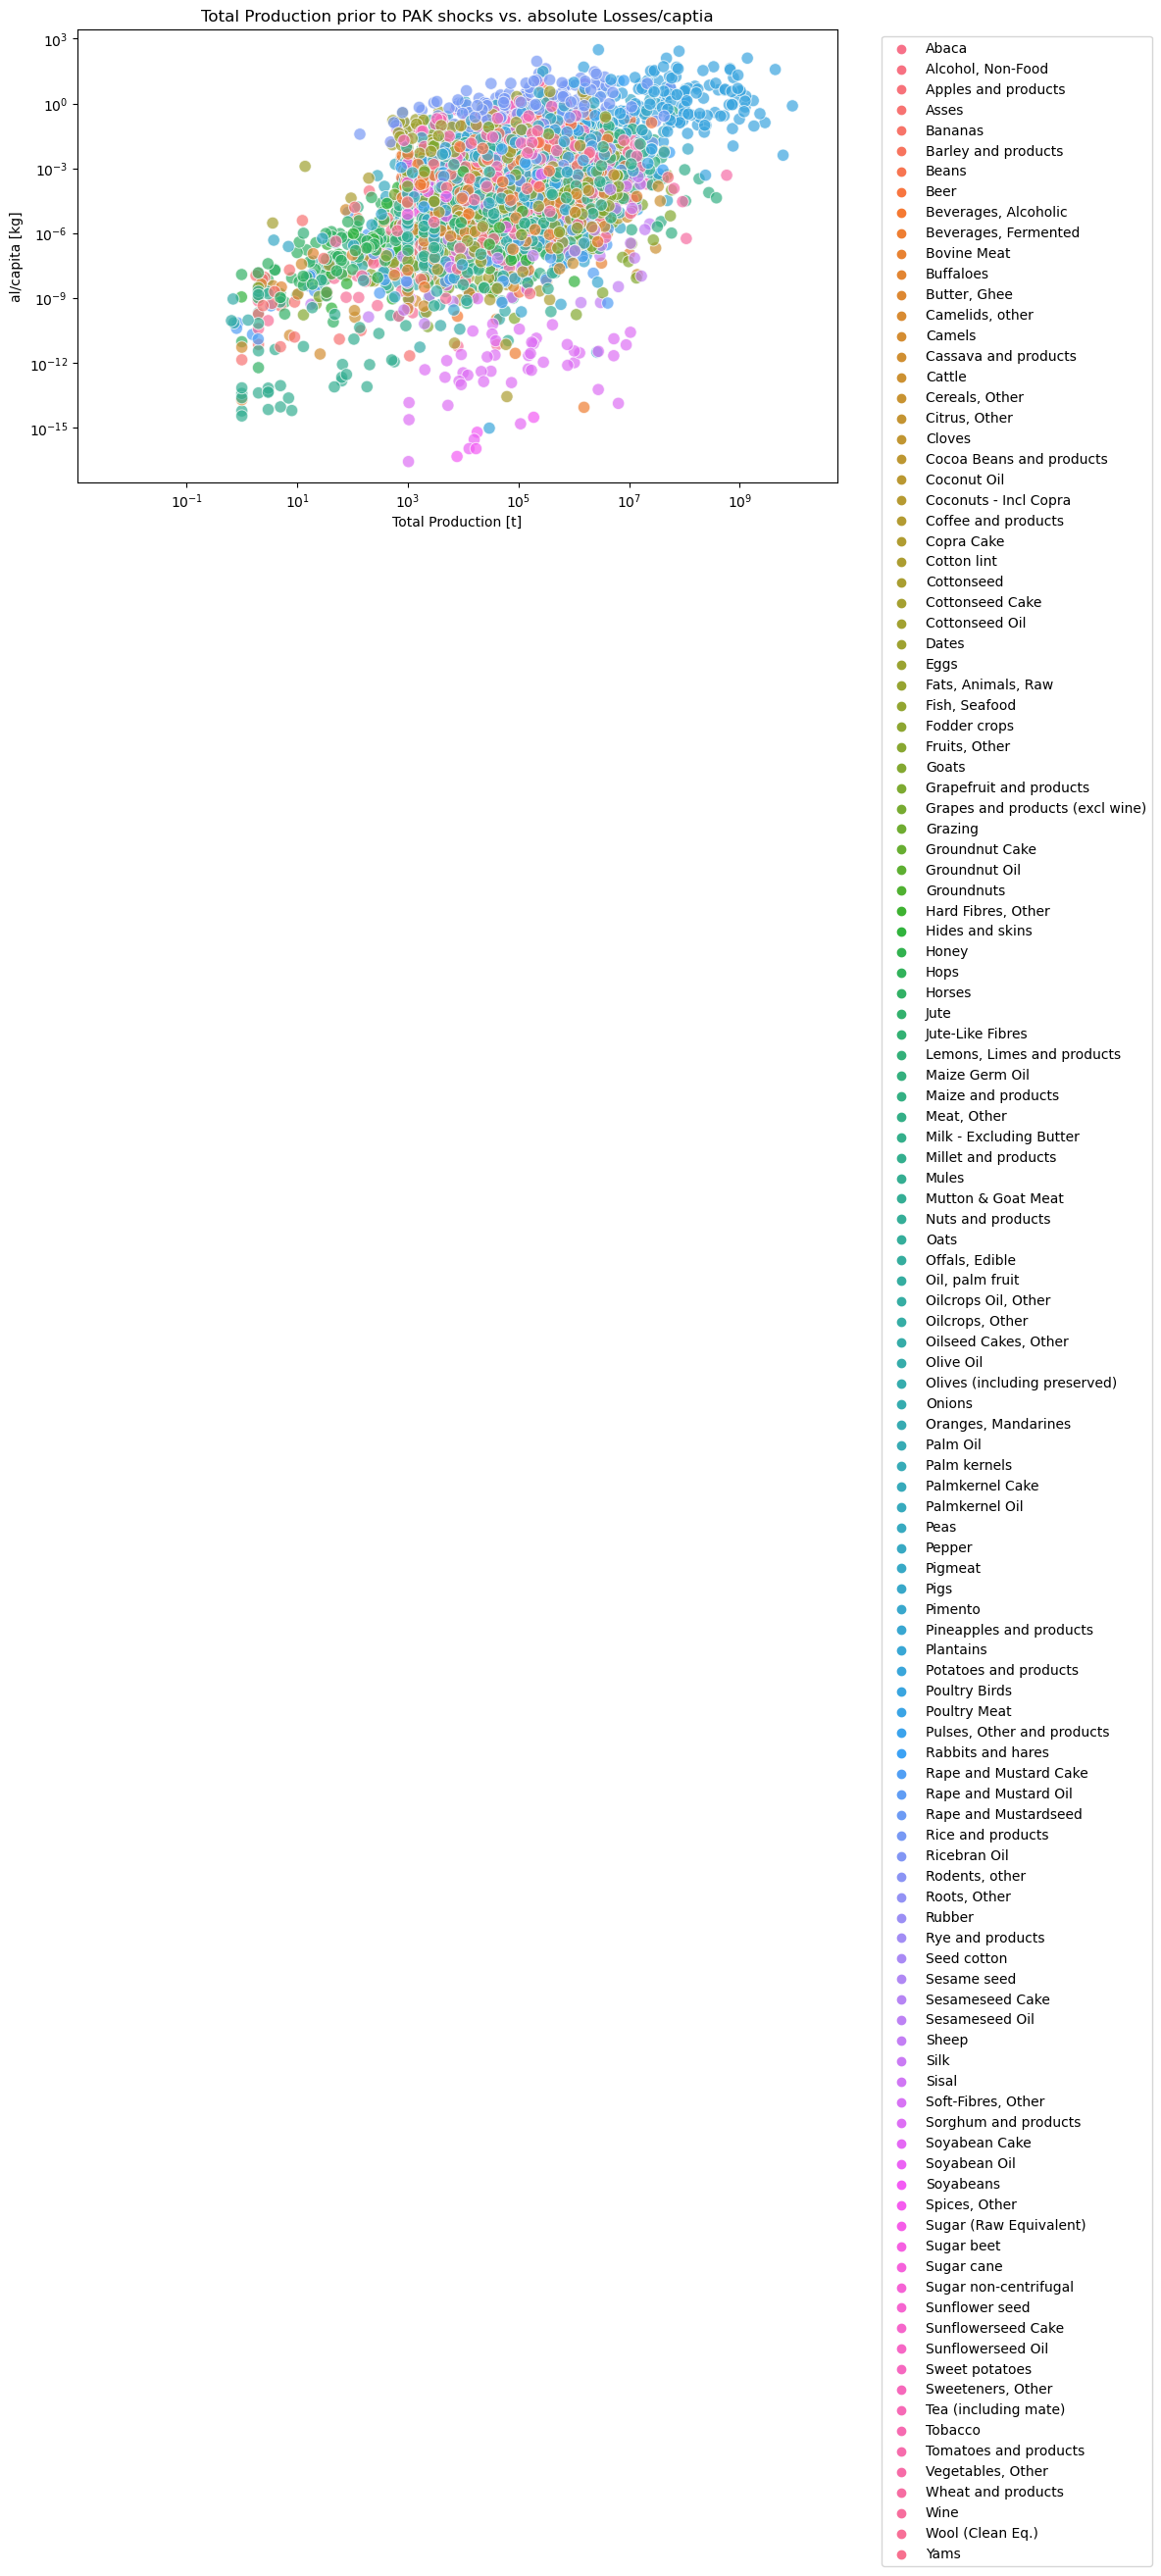

/tmp/ipykernel_19064/2054449147.py:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



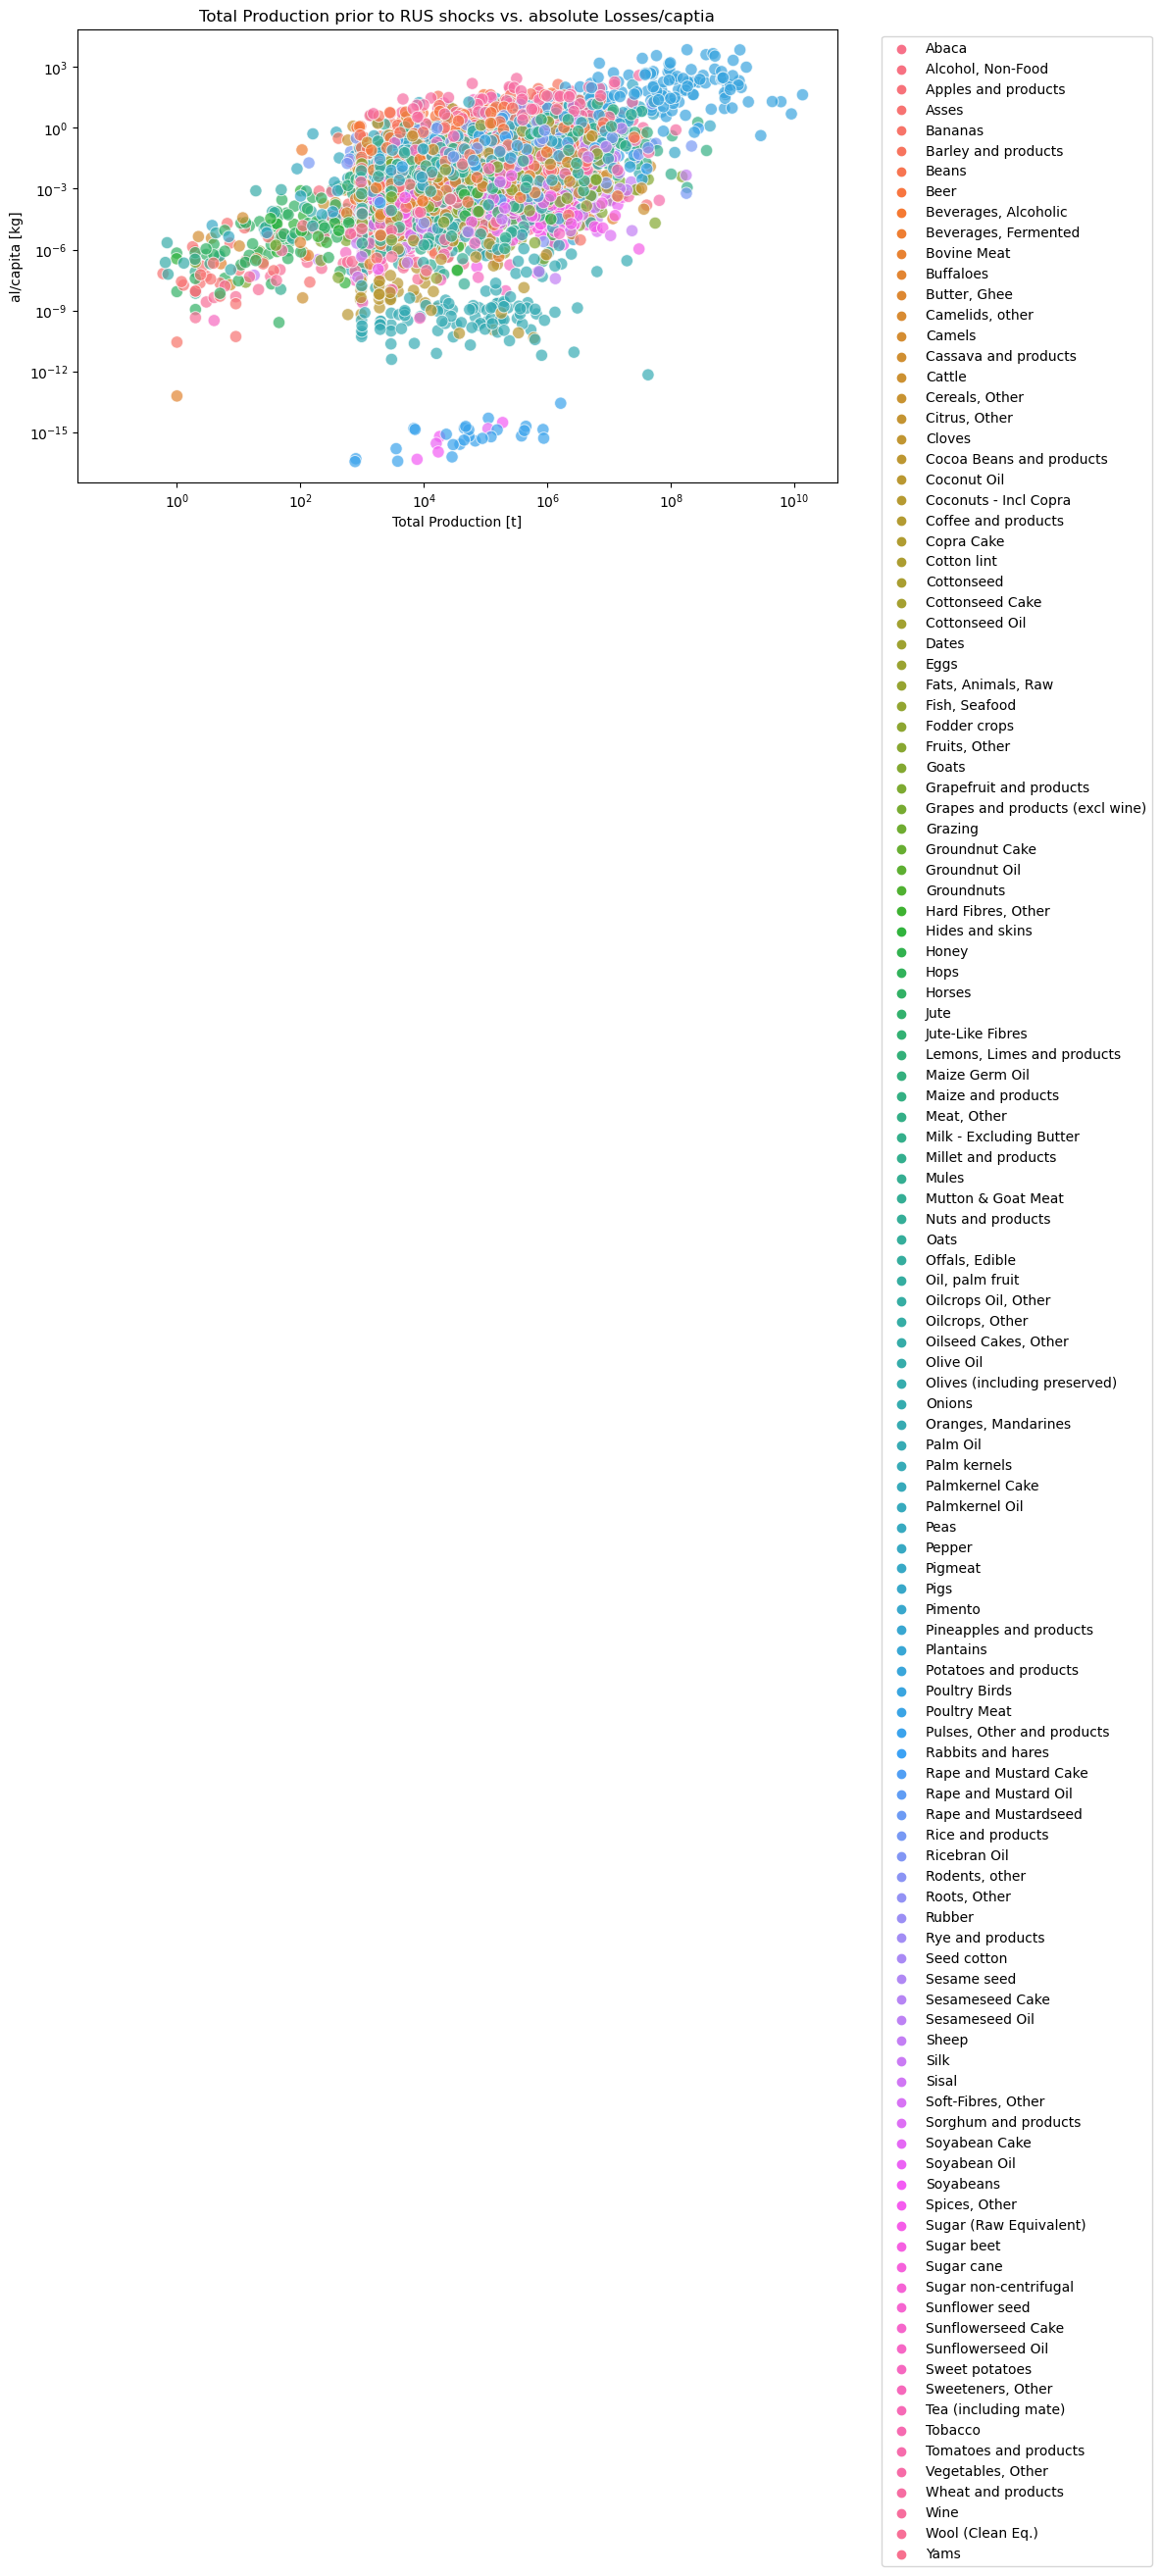

/tmp/ipykernel_19064/2054449147.py:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



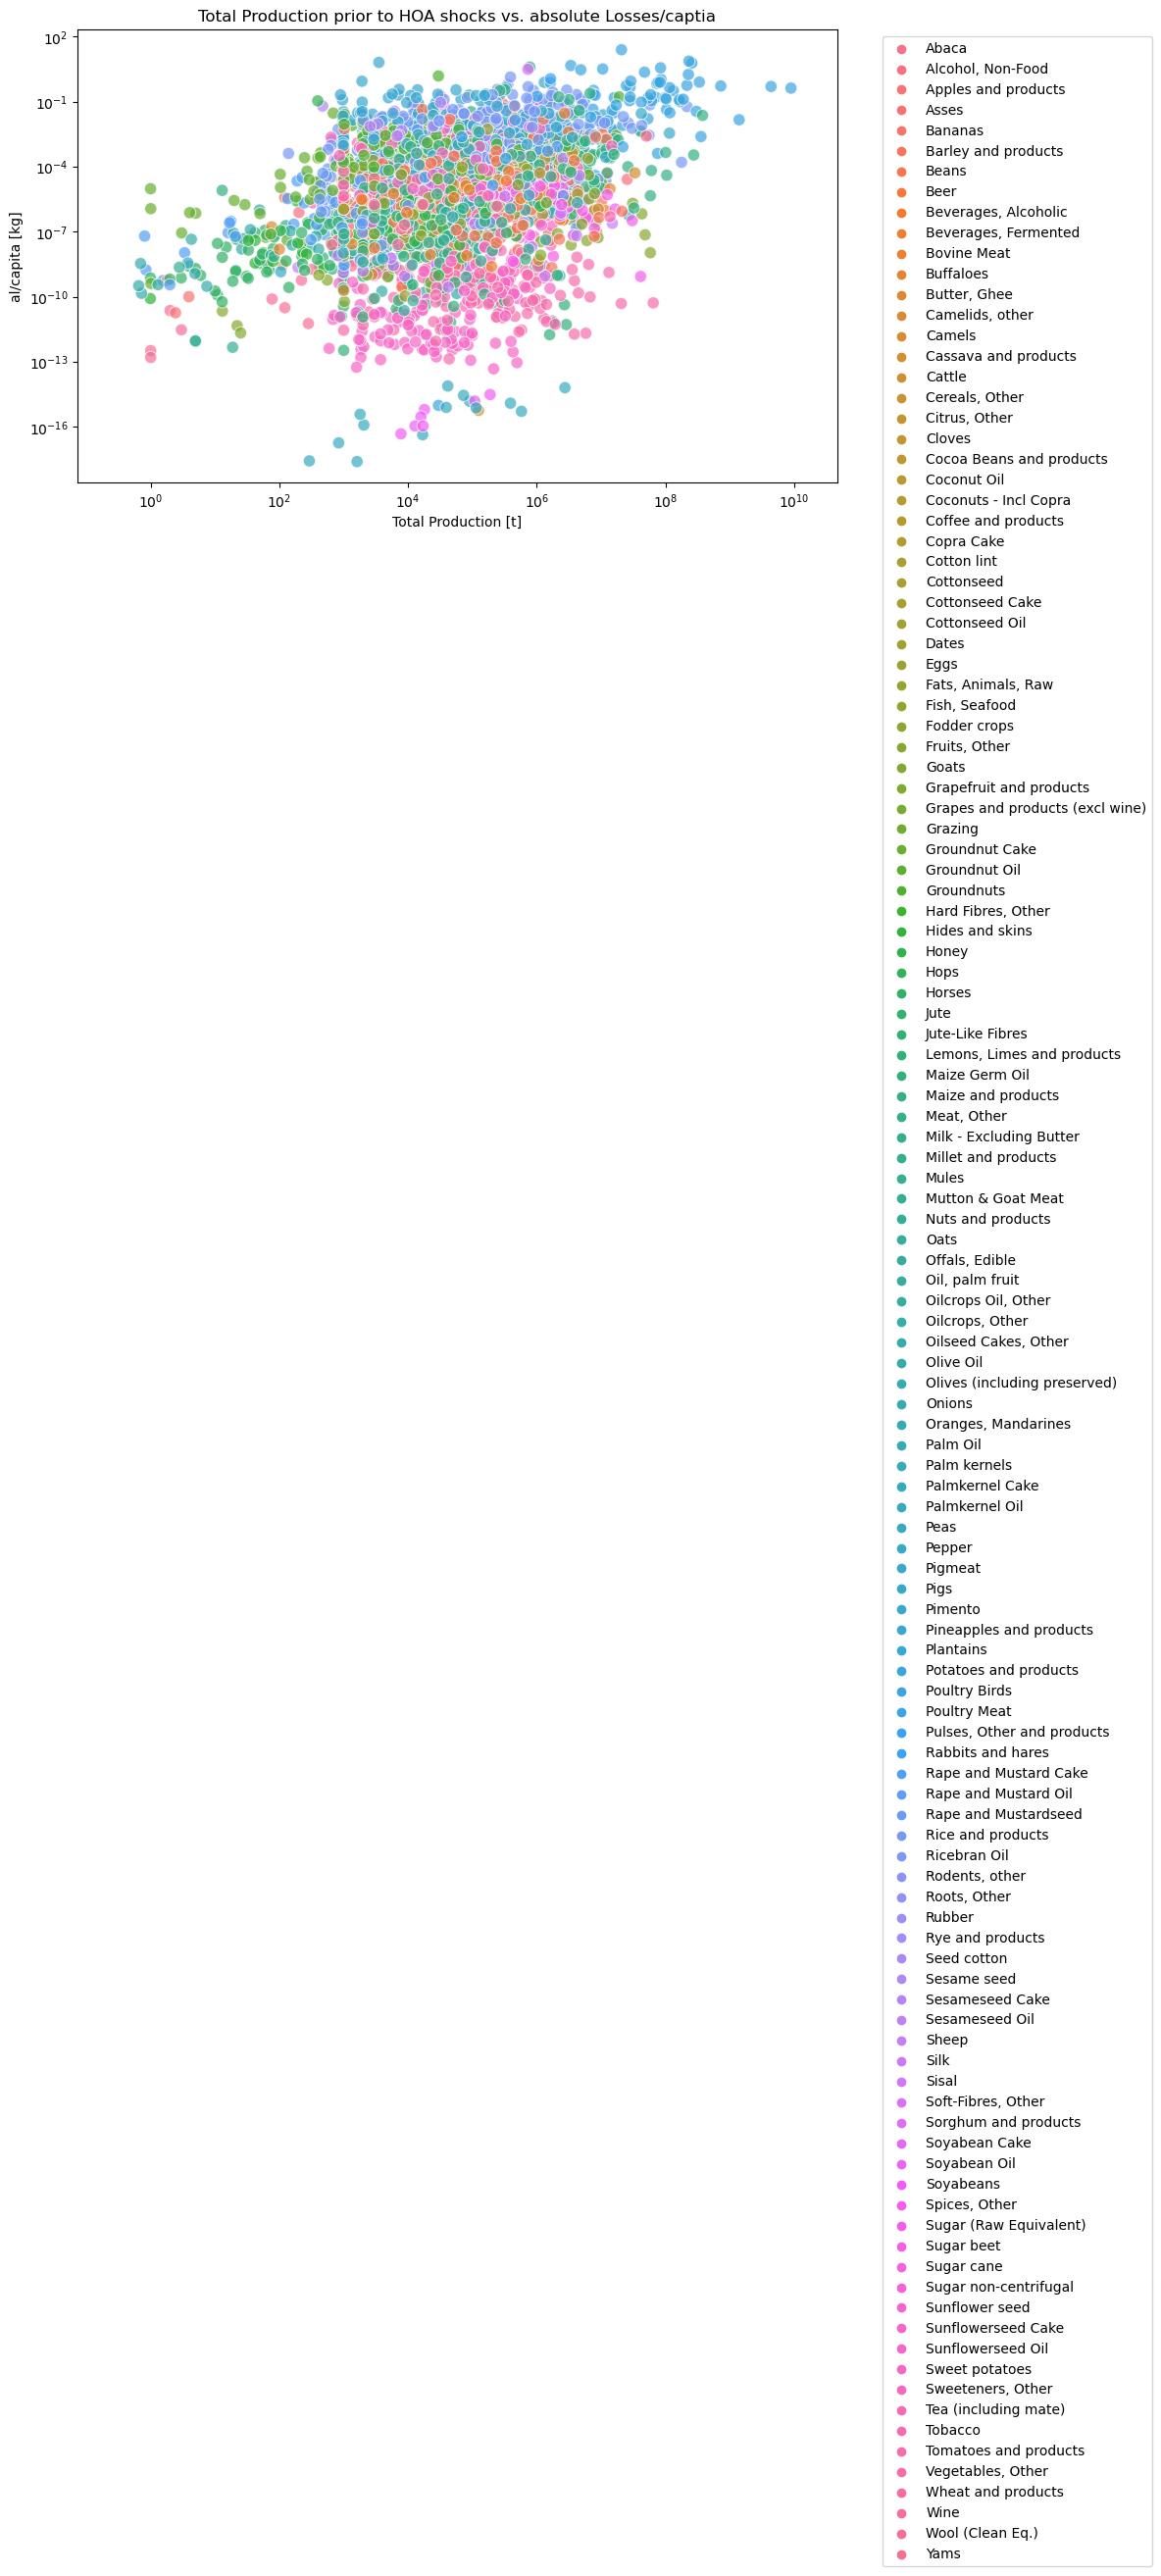

/tmp/ipykernel_19064/2054449147.py:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



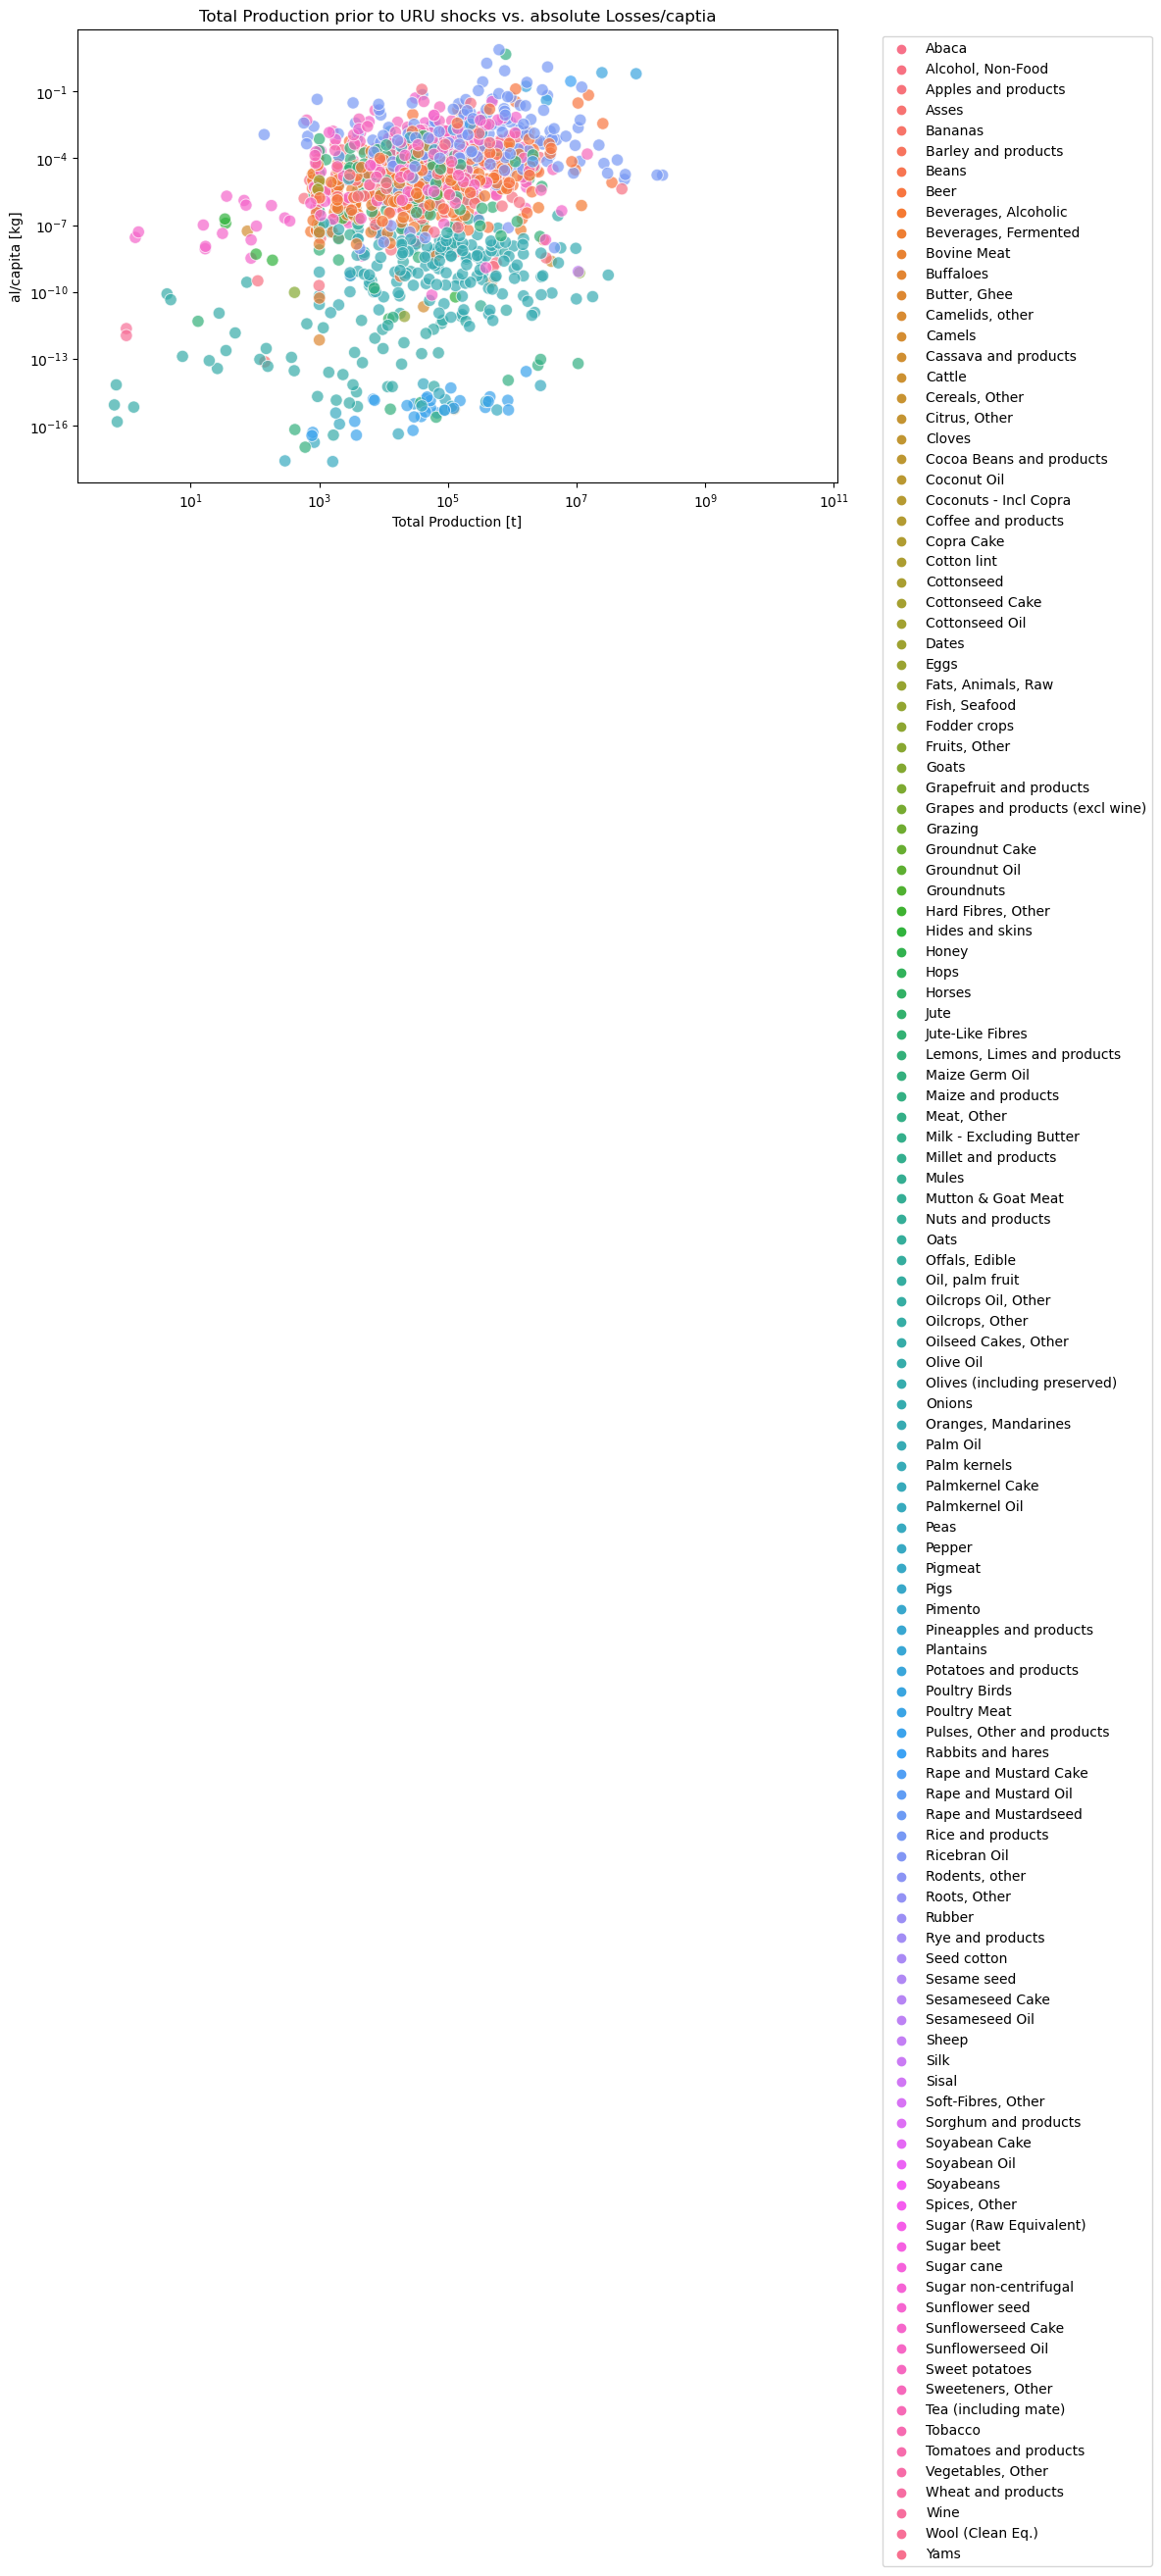

/tmp/ipykernel_19064/2054449147.py:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



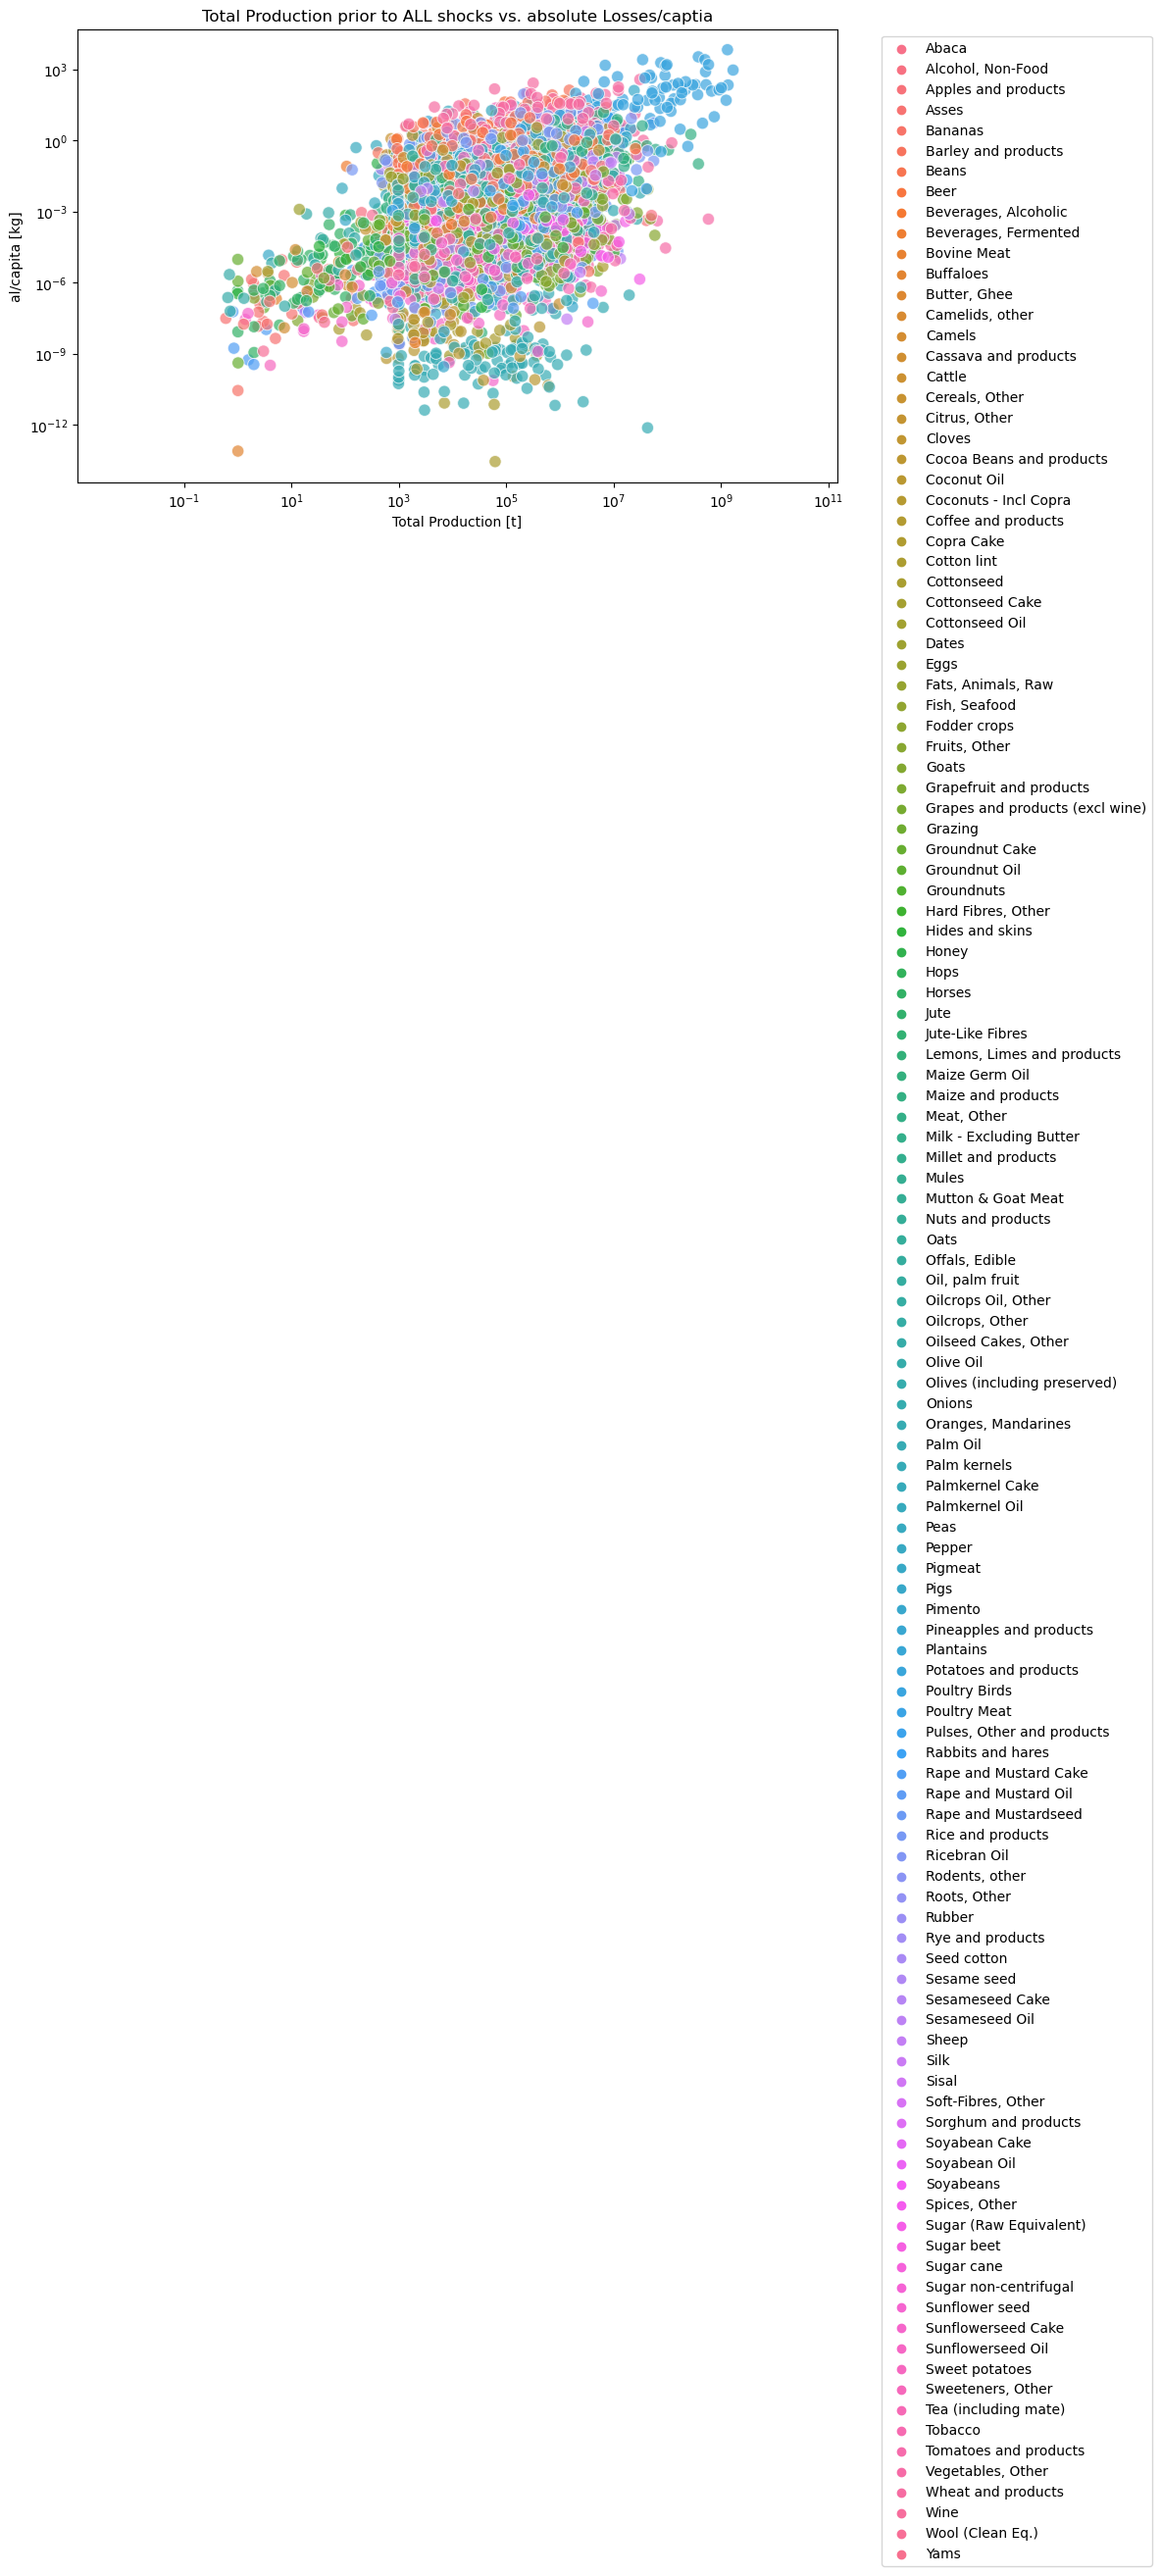

In [33]:
for i in range (len(scenario)):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
    data=df[i],
    x='amount [t]',
    y='al/capita [kg]',
    hue='item',
    alpha=0.7,
    edgecolor='w',
    s=80
    )
    
    plt.title("Total Production prior to " + scenario[i] + " shocks vs. absolute Losses/captia")
    plt.xlabel("Total Production [t]")
    plt.ylabel("al/capita [kg]")
    plt.xscale('log')  # Log scale helps if data spans wide ranges
    plt.yscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
    plt.tight_layout()
    plt.show()

In [34]:
for i in range (len(scenario)):
    data = df[i]
    df_rice = data[data['item'] == 'Rice and products']
    
    rice_losses_by_country = df_rice.groupby('area')['al/capita [kg]'].sum().reset_index()

    # Create the choropleth map using plotly.express
    fig = px.choropleth(
    rice_losses_by_country,
    locations="area", # Column in the DataFrame containing country names
    locationmode="country names", # Specifies that 'locations' column contains country names
    color="al/capita [kg]", # Column to determine the color intensity
    hover_name="area", # Information to display on hover
    color_continuous_scale=px.colors.sequential.Plasma, # Color scale for the map
    title="Absolute Losses/c for 'Rice and products' by Country after " + scenario[i], # Title of the map
    projection="natural earth" # Type of map projection
    )
    fig.show()

In [36]:
for i in range (len(scenario)):
    data = df[i]
    df_rice = data[data['item'] == 'Poultry Birds']
    
    rice_losses_by_country = df_rice.groupby('area')['al/capita [kg]'].sum().reset_index()

    # Create the choropleth map using plotly.express
    fig = px.choropleth(
    rice_losses_by_country,
    locations="area", # Column in the DataFrame containing country names
    locationmode="country names", # Specifies that 'locations' column contains country names
    color="al/capita [kg]", # Column to determine the color intensity
    hover_name="area", # Information to display on hover
    color_continuous_scale=px.colors.sequential.Plasma, # Color scale for the map
    title="Absolute Losses/c for 'Poultry Birds' by Country after " + scenario[i], # Title of the map
    projection="natural earth" # Type of map projection
    )
    fig.show()

In [37]:
for i in range (len(scenario)):
    data = df[i]
    df_rice = data[data['item'] == 'Maize and products']
    
    rice_losses_by_country = df_rice.groupby('area')['al/capita [kg]'].sum().reset_index()

    # Create the choropleth map using plotly.express
    fig = px.choropleth(
    rice_losses_by_country,
    locations="area", # Column in the DataFrame containing country names
    locationmode="country names", # Specifies that 'locations' column contains country names
    color="al/capita [kg]", # Column to determine the color intensity
    hover_name="area", # Information to display on hover
    color_continuous_scale=px.colors.sequential.Plasma, # Color scale for the map
    title="Absolute Losses/c for 'Maize and products' by Country after " + scenario[i], # Title of the map
    projection="natural earth" # Type of map projection
    )
    fig.show()